# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

#### Библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

#### Читаем файл:

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') #поставил разделитель для упрощения чтения данных
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


#### Посмотрим значения

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

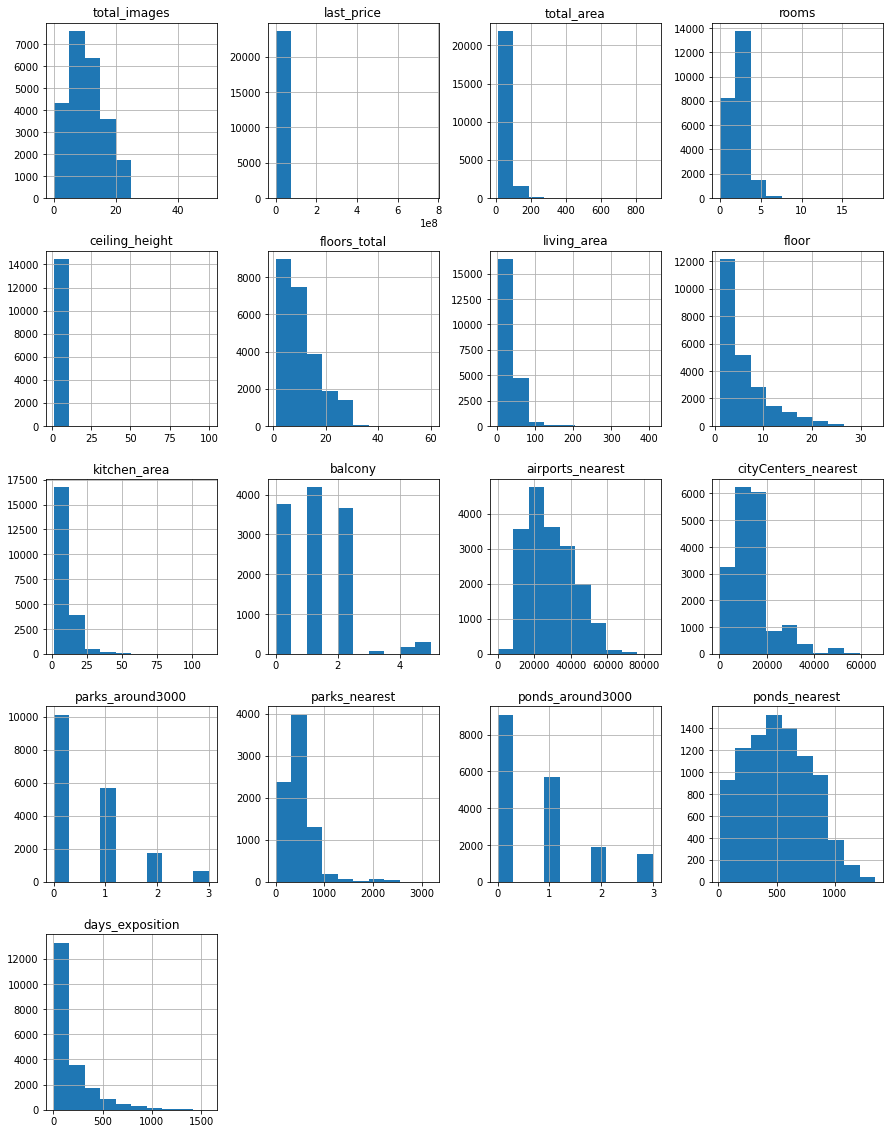

In [4]:
data.hist(figsize=(15, 20))

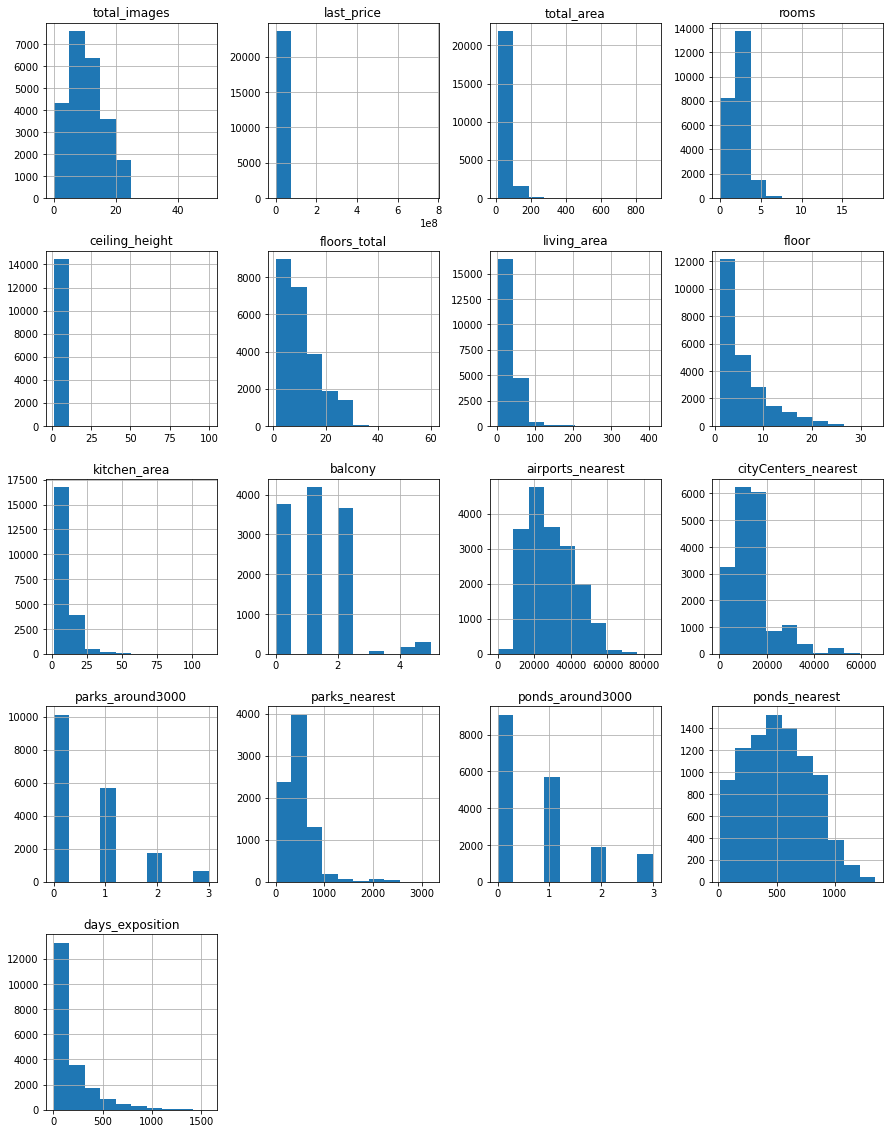

In [5]:
# Код ревьюера

data.hist(figsize=(15, 20))
None

##### Вывод:
    
    Общее кол-во значений(без пропусков) - 23699
      
      Из данных полученных выше следует:
  
       1)is_apartment - присутствуют нулевые значения
       2)floors_total - присутствуют нулевые значения
       3)ceiling_height - присутствуют нулевые значения
       4)first_day_exposition - нужно поменять тип на datetime
       5)kitchen_area - присутствуют нулевые значения
       6)living_area - присутствуют нулевые значения
       7)balcony - присутствуют нулевые значения
       8)locality_name - присутствуют нулевые значения
       9)airports_nearest - присутствуют нулевые значения
       10)cityCenters_nearest - присутствуют нулевые значения
       11)parks_around3000 - присутствуют нулевые значения
       12)parks_nearest - присутствуют нулевые значения
       13)ponds_around3000 - присутствуют нулевые значения
       14)days_exposition - присутствуют нулевые значения
       15)ponds_nearest - присутствуют нулевые значения

 #### Переходим к предобработке

### Предобработка данных

#### Проверим значения в столбцах на предмет ошибок и нестандартных значений

##### Смотрим на количество пропусков

In [6]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
data.isna().mean()*100 # % пропусков

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

In [8]:
print(data.columns)
data['total_images'].value_counts()
data['ceiling_height'].value_counts()
data['is_apartment'].value_counts()
data['total_area'].value_counts()
data['rooms'].value_counts()
data['airports_nearest'].value_counts()
data['parks_nearest'].value_counts()
data['parks_around3000'].value_counts()
data['ponds_around3000'].value_counts()
data['cityCenters_nearest'].value_counts()
data['floor'].value_counts()
#объеденил в 1 строку при оформлении проекта

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

#### Столбцы оставляем как есть, начнём работать с пропусками и корректировками

In [9]:
#заметил, что пропущенные значения в locality_name имеют непонятную причину появления - оставим как есть
data['locality_name'].value_counts()

Санкт-Петербург           15721
посёлок Мурино              522
посёлок Шушары              440
Всеволожск                  398
Пушкин                      369
                          ...  
поселок Семиозерье            1
поселок Жилгородок            1
деревня Раздолье              1
поселок Пчевжа                1
посёлок Высокоключевой        1
Name: locality_name, Length: 364, dtype: int64

In [10]:
#меняю формат столбца first_day_exposition в человеческий(дата без времени)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['first_day_exposition'] #кол-во значений 23699 - пропусков нет

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [11]:
#заменяю пропуски в days_exposition
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')#решил заодно поменять формат на int
data['days_exposition'] #кол-во значений 23699, следовательно пропуски заменены

0          0
1         81
2        558
3        424
4        121
        ... 
23694      0
23695     45
23696      0
23697    602
23698      0
Name: days_exposition, Length: 23699, dtype: int64

In [12]:
#предположил, что в balcony пропуски означают отсутствие балконов как таковых - решил заменить пропуски на 0
data['balcony'] = data['balcony'].fillna(0).astype('int') #опять же, заодно заменил тип данных на Int
data['balcony'] #кол-во значений 23699 - пропусков нет

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: int64

In [13]:
#столбец is_apartment - очень много пропусков, смею предположить, что лмбо столбец был изначально заполнен неверно, либо
#это какой-то новый столбец, который ещё не обработали, в нём встречаются значения False и NaN, поэтому предлагаю всё привести к
#общему знаменателю - False(если бы это была реальная задача от заказщика, было бы целесообразно выяснить природу данного
#столбца и насколько он будет необходим)
data['is_apartment'].sample(10)
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'] #кол-во значений 23699, следовательно пропуски заменены

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23699, dtype: bool

In [14]:
data[data['floors_total'].isna()] #если посмотреть на пропуски в floors_total, их нельзя обобщить, поэтому оставлю как есть
data['floors_total'] #кол-во значений 23699, следовательно пропуски заменены

0        16.0
1        11.0
2         5.0
3        14.0
4        14.0
         ... 
23694     5.0
23695     5.0
23696     3.0
23697    17.0
23698     5.0
Name: floors_total, Length: 23699, dtype: float64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18545,6,3750000.0,43.0,2019-03-18,2,25.0,5.0,29.0,3,False,...,NaN,0,Санкт-Петербург,27054.0,8033.0,1.0,540.0,0.0,NaN,12
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,False,...,5.7,0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,0
14382,9,1700000.0,35.0,2015-12-04,1,25.0,5.0,20.0,2,False,...,8.0,1,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,206
11285,0,1950000.0,37.0,2019-03-20,1,25.0,5.0,17.0,4,False,...,9.0,2,Луга,NaN,NaN,NaN,NaN,NaN,NaN,18
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,...,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5.0,30.0,2,False,...,5.2,0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,False,...,7.0,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,...,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,...,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540


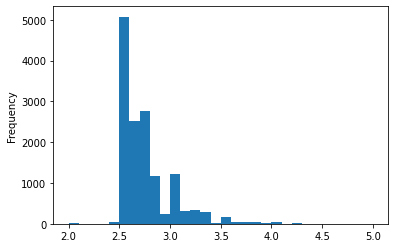

In [15]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))
data['ceiling_height'].value_counts()
data['ceiling_height'].describe()
data[data['ceiling_height'] > 4].sort_values('ceiling_height').tail(20)

In [16]:
data['living_area'].value_counts()
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [17]:
data['last_price'] = data['last_price'].astype('int')#поменял на int для удобства чтения
data['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

In [18]:
data['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [19]:
def upper_str(string):
    for i in range(len(string)):
        if string[i].isupper() == True:
            return(string[i:len(string)])

In [20]:
data['locality_name'] = data['locality_name'].fillna('Неизвестно')

In [21]:
data['locality_name_new'] = data['locality_name'].apply(upper_str)

In [22]:
data['locality_name_new'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Добавили столбец locality_name_new в него записали значения без типов населённых пунктов.

(0.0, 1000.0)

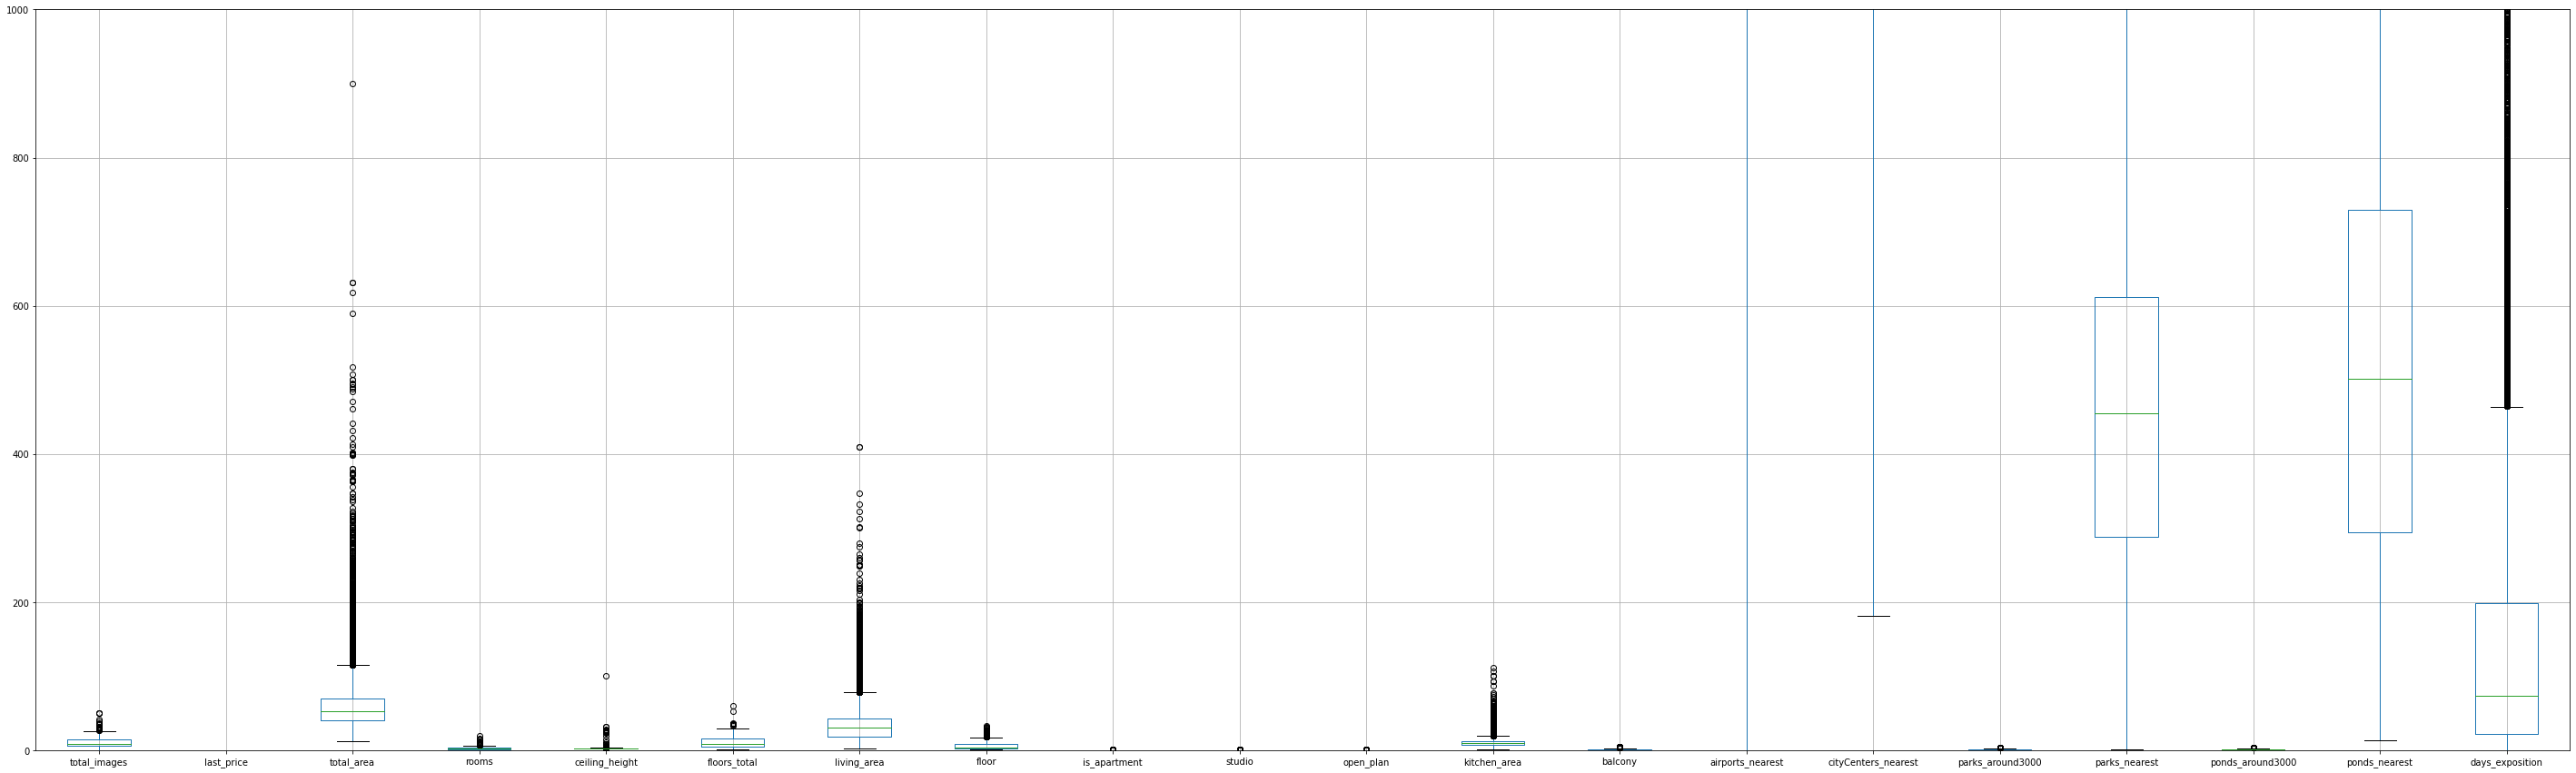

In [23]:
data.boxplot(figsize = (50, 15))
plt.ylim(0,1000)

(0.0, 100.0)

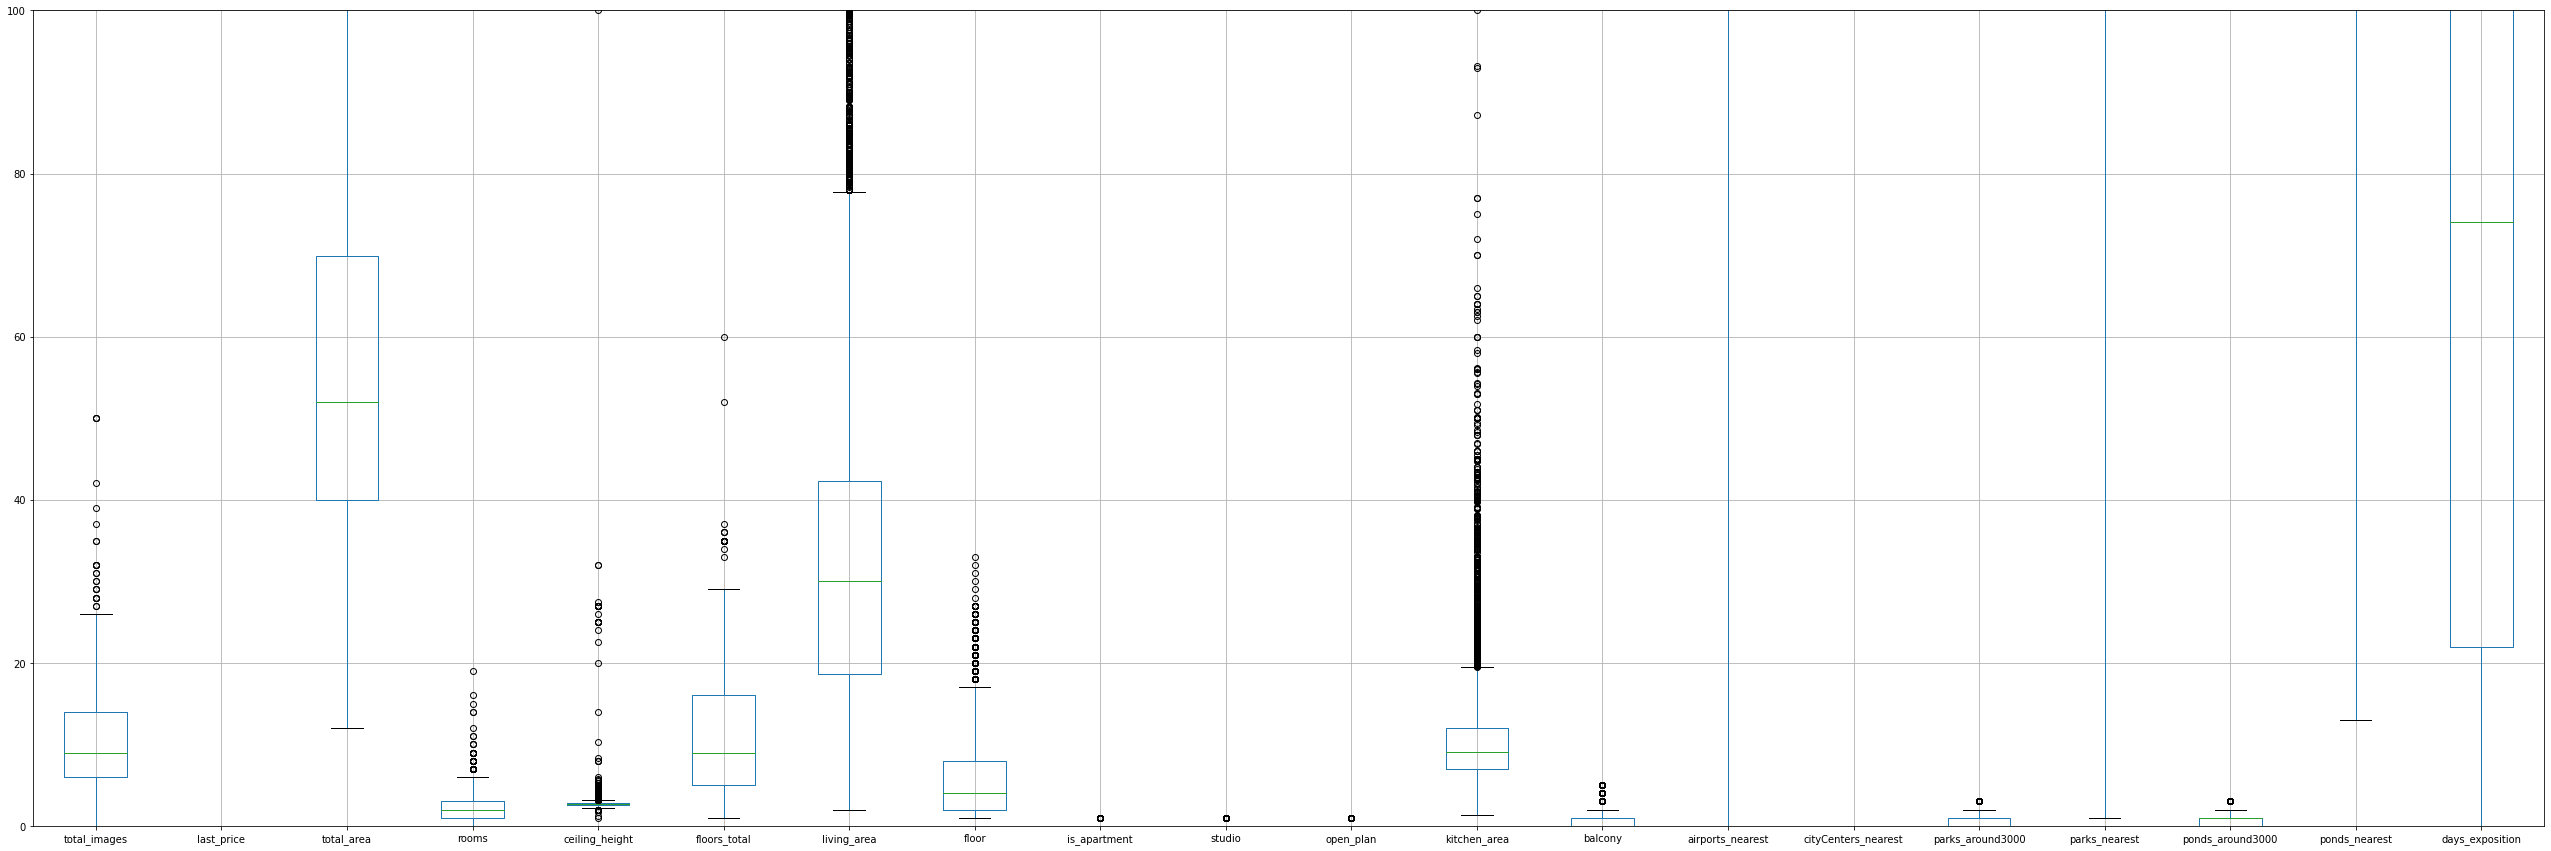

In [24]:
data.boxplot(figsize = (45, 15))
plt.ylim(0,100)

Видно, что в last_price привутствуют крайне высокие значения, но их не так много(возможно действительно очень дорогие квартиры)
В других столбцах также присутствуют крайне высокие значения, но в пределах нормы(то есть например пик в высоте потолков может быть связан с уникальным значением присущем какой-то одной квартире, или например, площадь кухни, где есть очень высокое значение, но в реальных пределах)

In [25]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

### Посчитайте и добавьте в таблицу новые столбцы

Цена одного квадратного метра
День публикации объявления
Месяц публикации объявления
Год публикации объявления
Тип этажа квартиры
Расстояние в км до центра города

In [26]:
#начнём с цены квадратного метра
data['cena_kvadratnogo_metra'] = (data['last_price']/data['total_area']).astype('int') #привел к int для удобства
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,cena_kvadratnogo_metra
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,Санкт-Петербург,120370
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,Шушары,82920
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,Санкт-Петербург,92785
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,Санкт-Петербург,408176
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,Санкт-Петербург,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,0,Санкт-Петербург,72490
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45,Тосно,52542
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,0,Рождествено,44091
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602,Санкт-Петербург,149511


In [27]:
#создал столбец для дня недели
data['den_nedeli'] = data['first_day_exposition'].dt.weekday
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,cena_kvadratnogo_metra,den_nedeli
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,0,Санкт-Петербург,120370,3
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81,Шушары,82920,1
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558,Санкт-Петербург,92785,3
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424,Санкт-Петербург,408176,4
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121,Санкт-Петербург,100000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,24665.0,4232.0,1.0,796.0,3.0,381.0,0,Санкт-Петербург,72490,1
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,NaN,NaN,NaN,NaN,NaN,45,Тосно,52542,0
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,0,Рождествено,44091,6
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,39140.0,10364.0,2.0,173.0,3.0,196.0,602,Санкт-Петербург,149511,1


In [28]:
#создал столбец для месяца
data['mesyac'] = data['first_day_exposition'].dt.month
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,cena_kvadratnogo_metra,den_nedeli,mesyac
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,0,Санкт-Петербург,120370,3,3
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81,Шушары,82920,1,12
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558,Санкт-Петербург,92785,3,8
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424,Санкт-Петербург,408176,4,7
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121,Санкт-Петербург,100000,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,4232.0,1.0,796.0,3.0,381.0,0,Санкт-Петербург,72490,1,3
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,NaN,NaN,NaN,NaN,45,Тосно,52542,0,1
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,NaN,NaN,NaN,NaN,0,Рождествено,44091,6,2
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,10364.0,2.0,173.0,3.0,196.0,602,Санкт-Петербург,149511,1,3


In [29]:
#создал столбец для года
data['god'] = data['first_day_exposition'].dt.year
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,cena_kvadratnogo_metra,den_nedeli,mesyac,god
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,0,Санкт-Петербург,120370,3,3,2019
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81,Шушары,82920,1,12,2018
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558,Санкт-Петербург,92785,3,8,2015
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,2.0,84.0,3.0,234.0,424,Санкт-Петербург,408176,4,7,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121,Санкт-Петербург,100000,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,1.0,796.0,3.0,381.0,0,Санкт-Петербург,72490,1,3,2017
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,NaN,NaN,NaN,45,Тосно,52542,0,1,2018
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,NaN,NaN,NaN,0,Рождествено,44091,6,2,2018
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,2.0,173.0,3.0,196.0,602,Санкт-Петербург,149511,1,3,2017


In [30]:
#для создания столбца с категориями этажей напишем функцию
def floor_catt(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
#применим функцию выше
data['floor_catt'] = data.apply(floor_catt, axis = 1)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,cena_kvadratnogo_metra,den_nedeli,mesyac,god,floor_catt
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,0,Санкт-Петербург,120370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,0.0,NaN,81,Шушары,82920,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,90.0,2.0,574.0,558,Санкт-Петербург,92785,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,84.0,3.0,234.0,424,Санкт-Петербург,408176,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121,Санкт-Петербург,100000,1,6,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,796.0,3.0,381.0,0,Санкт-Петербург,72490,1,3,2017,другой
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,NaN,NaN,45,Тосно,52542,0,1,2018,другой
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,NaN,NaN,0,Рождествено,44091,6,2,2018,первый
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,173.0,3.0,196.0,602,Санкт-Петербург,149511,1,3,2017,другой


In [31]:
#перевеёл метры в километры в столбце 
data['km_do_centra'] = data['cityCenters_nearest']/1000
data['km_do_centra'].round() # округлил
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_new,cena_kvadratnogo_metra,den_nedeli,mesyac,god,floor_catt,km_do_centra
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,0,Санкт-Петербург,120370,3,3,2019,другой,16.028
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81,Шушары,82920,1,12,2018,первый,18.603
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558,Санкт-Петербург,92785,3,8,2015,другой,13.933
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424,Санкт-Петербург,408176,4,7,2015,другой,6.800
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121,Санкт-Петербург,100000,1,6,2018,другой,8.098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,3.0,381.0,0,Санкт-Петербург,72490,1,3,2017,другой,4.232
23695,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,NaN,NaN,45,Тосно,52542,0,1,2018,другой,NaN
23696,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,NaN,0,Рождествено,44091,6,2,2018,первый,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,3.0,196.0,602,Санкт-Петербург,149511,1,3,2017,другой,10.364


### Проведите исследовательский анализ данных

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

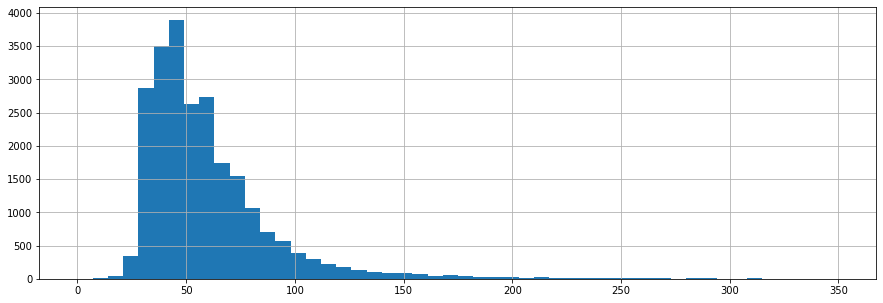

In [32]:
data['total_area'].hist(range = (0,350), bins = 50, figsize=(15, 5))
data['total_area'].describe()

Как мы можем заметить, преобладает площадь в 50 квадратных метров, минимальная площадь - 12 квадратных метров(это либо очень маленькая однушка либо сюда затесалась комната, выставленная на продажу)

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

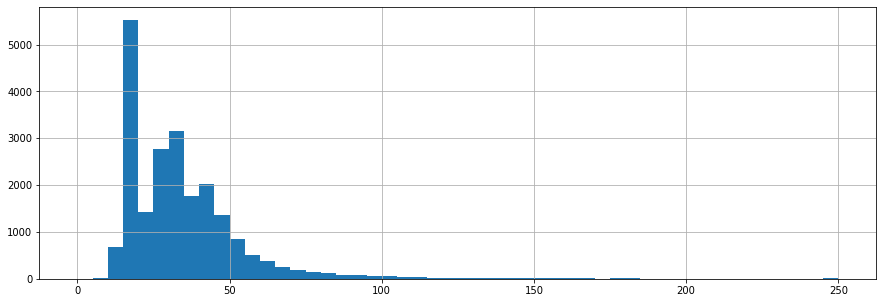

In [33]:
data['living_area'].hist(range = (0,250), bins = 50, figsize=(15, 5))
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

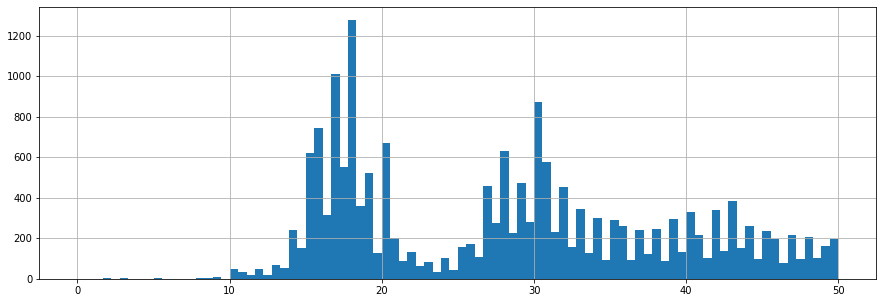

In [34]:
#Посмотрим чуть поближе
data['living_area'].hist(range = (0,50), bins = 90, figsize=(15, 5))
data['living_area'].describe()

Преобладает жил-площадь 17-18кв метров, минимальная жил площадь 2 кв.м - это скорее всего из той однушки, что мы видели выше

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

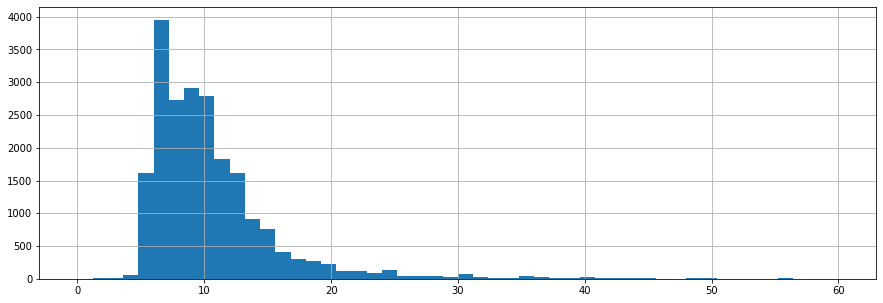

In [35]:
data['kitchen_area'].hist(range = (0, 60), bins = 50, figsize=(15, 5))
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

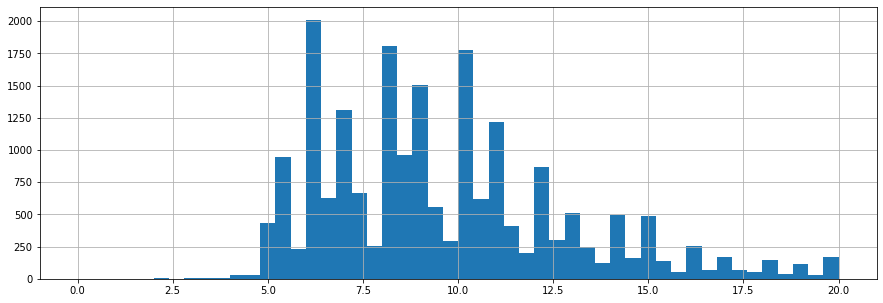

In [36]:
#Посмотрим поближе
data['kitchen_area'].hist(range = (0, 20), bins = 50, figsize=(15, 5))
data['kitchen_area'].describe()

Преобладает площадь в 6кв.м, минимальная 1,3 кв метра(может быть студия, где по сути вся квартира - единая площадь

<AxesSubplot:>

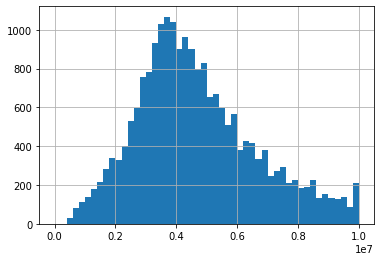

In [37]:
data['last_price'].hist(range = (0,  10000000),bins = 50)

In [38]:
pd.set_option('display.float_format', str)
print(pd.Series(data['last_price'].sort_values(ascending=False)))

12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
           ...    
16219       450000
16274       440000
17456       430000
14911       430000
8793         12190
Name: last_price, Length: 23699, dtype: int64


Самая высокая цена - 763 000 000, самая низкая из адекватных - 1 190 000

count              23699.0
mean     2.070635891809781
std     1.0784048508846824
min                    0.0
25%                    1.0
50%                    2.0
75%                    3.0
max                   19.0
Name: rooms, dtype: float64

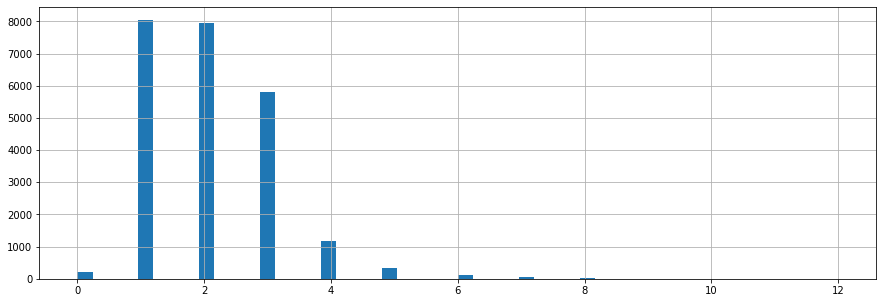

In [39]:
data['rooms'].hist(range = (0, 12), bins = 50, figsize=(15, 5))
data['rooms'].describe()

Двушки - доминируют, дальше наблюдается тенденция на понижение с увеличением кол-ва комнат

count              14504.0
mean      2.77149889685604
std     1.2610558309868416
min                    1.0
25%                   2.52
50%                   2.65
75%                    2.8
max                  100.0
Name: ceiling_height, dtype: float64

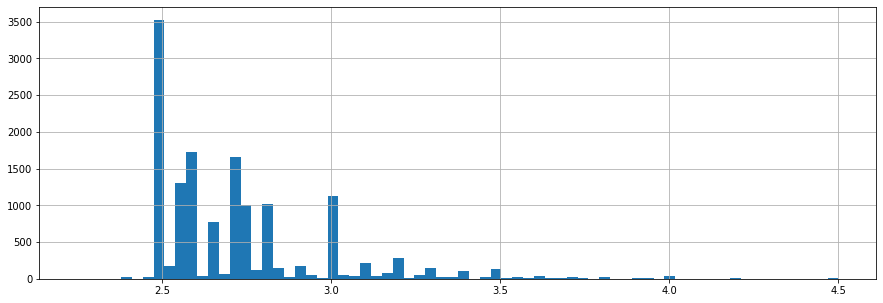

In [40]:
data['ceiling_height'].hist(range = (2.25,4.5), bins = 70, figsize=(15, 5))
data['ceiling_height'].describe()

Чащек всего встречаются потолки 2.5 метра, всё что выше 3.5 метров, скорее всего частные случаи(я видел студии, где делают как бы 2 этажа, как раз 4-4.5 метра)

count             23699.0
mean    5.892358327355584
std     4.885249206175966
min                   1.0
25%                   2.0
50%                   4.0
75%                   8.0
max                  33.0
Name: floor, dtype: float64

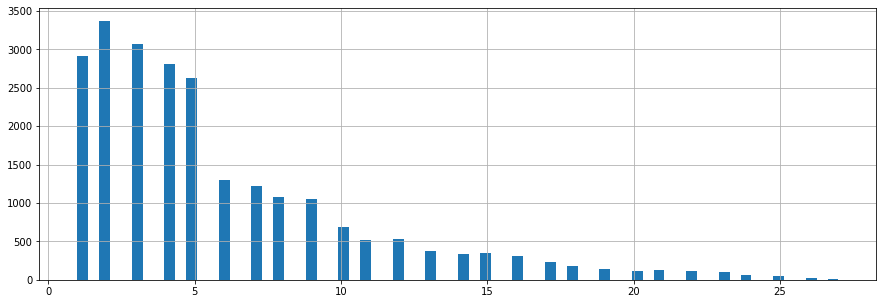

In [41]:
data['floor'].hist(range = (1, 27), bins = 70, figsize=(15, 5))
data['floor'].describe()

Чаще всего продаются квартиры с 3его по 5ый этаж, меньше всего 25 и выше

count      23699
unique         3
top       другой
freq       17446
Name: floor_catt, dtype: object

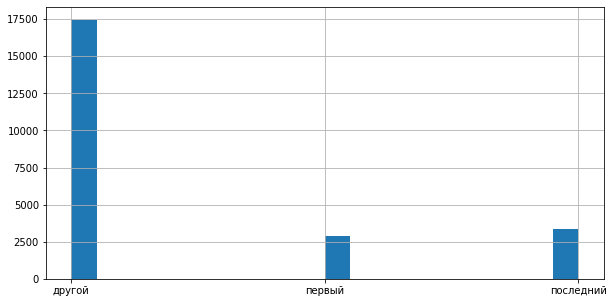

In [42]:
data['floor_catt'].hist(bins = 20, figsize=(10, 5))
data['floor_catt'].describe()

Чаще всего встречаются этажи отличные от первого и последнего, что подтверждается графиком выше

count             23613.0
mean    10.67382374115953
std     6.597172989041012
min                   1.0
25%                   5.0
50%                   9.0
75%                  16.0
max                  60.0
Name: floors_total, dtype: float64

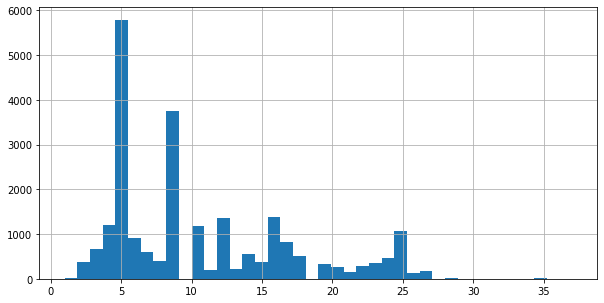

In [43]:
data['floors_total'].hist(range = (1, 37),bins = 40, figsize=(10, 5))
data['floors_total'].describe()

Пятиэтажные дома доминирут, меньше вс его высоток 25+

count              18180.0
mean    14191.277832783278
std      8608.386210013377
min                  181.0
25%                 9238.0
50%                13098.5
75%                16293.0
max                65968.0
Name: cityCenters_nearest, dtype: float64

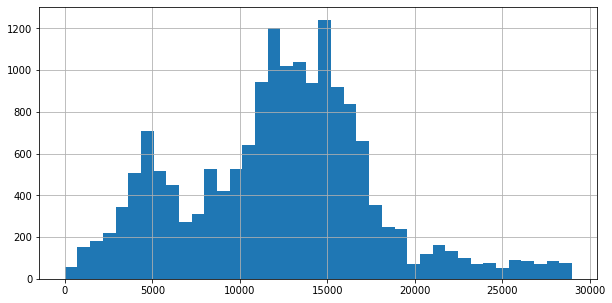

In [44]:
data['cityCenters_nearest'].hist(range = (0, 29000),bins = 40, figsize=(10, 5))
data['cityCenters_nearest'].describe()

Больше всего квартир в 15 километрах от центра, есть тенденция на уменьшения кол-ва заявок начиная с 20км

count              18157.0
mean     28793.67219254282
std     12630.880622296983
min                    0.0
25%                18585.0
50%                26726.0
75%                37273.0
max                84869.0
Name: airports_nearest, dtype: float64

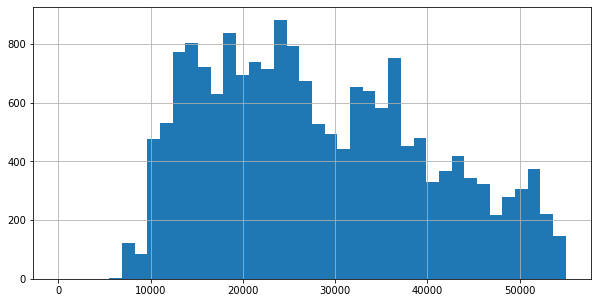

In [45]:
data['airports_nearest'].hist(range = (0, 55000),bins = 40, figsize=(10, 5))
data['airports_nearest'].describe()

Больше всего людей продают квартиры в 25км от Аеропорта, меньше всего в 10км

count               8079.0
mean    490.80455501918556
std      342.3179948606183
min                    1.0
25%                  288.0
50%                  455.0
75%                  612.0
max                 3190.0
Name: parks_nearest, dtype: float64

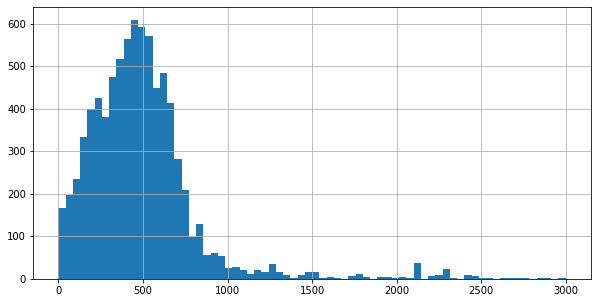

In [46]:
data['parks_nearest'].hist(range = (0, 3000),bins = 70, figsize=(10, 5))
data['parks_nearest'].describe()

Парки есть в пешей доступности у большинства продаваемых квартир, остальные находятся на отдалении +- 1-3км

count              23699.0
mean    2.5693067218026076
std     1.7890821650289601
min                    0.0
25%                    1.0
50%                    3.0
75%                    4.0
max                    6.0
Name: den_nedeli, dtype: float64

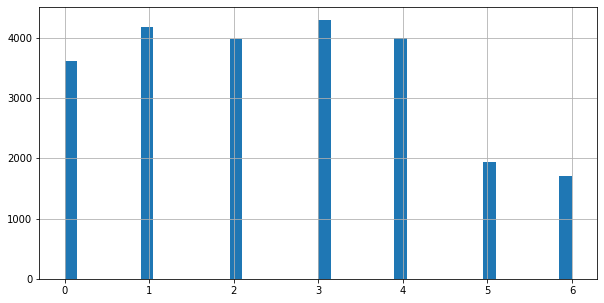

In [47]:
data['den_nedeli'].hist(bins = 40, figsize=(10, 5))
data['den_nedeli'].describe()

Заявкуи размещались равнозначно по будням и чуть меньше по выходным

count              23699.0
mean     6.400101270095784
std     3.4915607825622823
min                    1.0
25%                    3.0
50%                    6.0
75%                   10.0
max                   12.0
Name: mesyac, dtype: float64

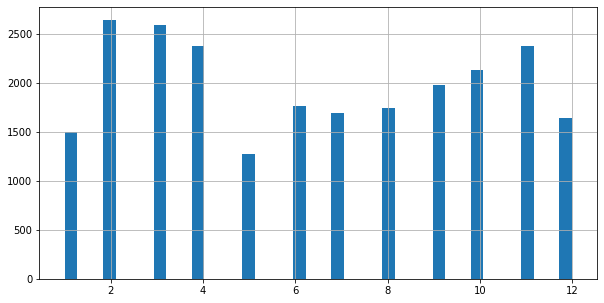

In [48]:
data['mesyac'].hist(bins = 40, figsize=(10, 5))
data['mesyac'].describe()

Больше всего февральских заявок - меньше всего майских(возможно причина в праздниках)

#### Задание: "Изучите, как быстро продавались квартиры

In [49]:
data['days_exposition'].describe()

count              23699.0
mean    156.60884425503187
std     213.54687293841963
min                    0.0
25%                   22.0
50%                   74.0
75%                  199.0
max                 1580.0
Name: days_exposition, dtype: float64

In [50]:
data['days_exposition'].mean(), data['days_exposition'].median() #найдём среднее и медианное значения

(156.60884425503187, 74.0)

In [51]:
data['days_exposition'].quantile(0.05), data['days_exposition'].quantile(0.95)

(0.0, 603.0)

Text(0, 0.5, 'Кол-во квартир')

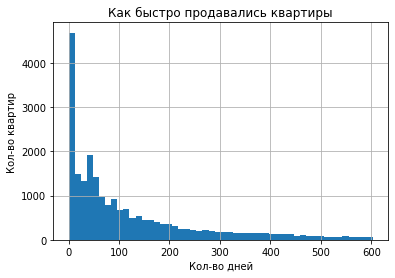

In [52]:
ax = data['days_exposition'].plot(kind = 'hist', bins = 50, range = (0,603), title = 'Как быстро продавались квартиры', grid = True)
ax.set_xlabel('Кол-во дней')
ax.set_ylabel('Кол-во квартир')
#поскольку после 100 дней график идёт на спад, предлагаю посмотреть на него в пределах 100 дней

Text(0, 0.5, 'Кол-во квартир')

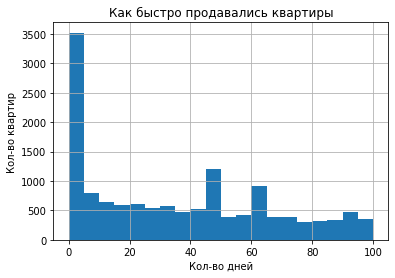

In [53]:
ax = data['days_exposition'].plot(kind='hist', bins=20, range=(0,100), title='Как быстро продавались квартиры', grid=True)
ax.set_xlabel('Кол-во дней')
ax.set_ylabel('Кол-во квартир')

##### Вывод:
    Cудя по грфику, можно сделать вывод, что больше всего квартир продаётся где-то в течение первых 5 дней,
    чуть чаще после 45 дней и 60 дней, и как уже сказал выше, далее кол-во квартир идёт на спад

#### Задание: Какие факторы больше всего влияют на общую (полную) стоимость объекта? 
    Постройте графики, которые покажут зависимость цены от указанных ниже параметров. 
    Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.
      - общей площади;
      - жилой площади;
      - площади кухни;
       - количество комнат;
      - типа этажа, на котором расположена квартира (первый, последний, другой);
      - даты размещения (день недели, месяц, год);

In [54]:

total_price = data.loc[:,['last_price','total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_catt','den_nedeli','mesyac', 'god']]


In [55]:
total_price.corr() #посмотрим на общую корреляцию

,last_price,total_area,living_area,kitchen_area,rooms,den_nedeli,mesyac,god
last_price,1.0,0.6536750579657243,0.5664915336952683,0.5198690130216392,0.3633428499648919,0.0015501452176215282,0.002779128750739763,-0.043089036199504556
total_area,0.6536750579657243,1.0,0.9395373338721552,0.6091211711198327,0.7583438234725607,-0.0046947237879159135,0.00492035289653614,-0.07991185467038309
living_area,0.5664915336952683,0.9395373338721552,1.0,0.4286743066844114,0.8459774567888834,-0.005604510784839908,-0.002483094216480468,-0.07269585705967498
kitchen_area,0.5198690130216392,0.6091211711198327,0.4286743066844114,1.0,0.2699448541638571,-0.008479569798765123,0.002499389195302512,-0.054735144747988365
rooms,0.3633428499648919,0.7583438234725607,0.8459774567888834,0.2699448541638571,1.0,-0.00413411626438323,-0.004468984285524089,-0.05541846688421775
den_nedeli,0.0015501452176215282,-0.0046947237879159135,-0.005604510784839908,-0.008479569798765123,-0.00413411626438323,1.0,0.011496232061986794,-0.004798531600405752
mesyac,0.002779128750739763,0.00492035289653614,-0.002483094216480468,0.002499389195302512,-0.004468984285524089,0.011496232061986794,1.0,-0.26964159708103386
god,-0.043089036199504556,-0.07991185467038309,-0.07269585705967498,-0.054735144747988365,-0.05541846688421775,-0.004798531600405752,-0.26964159708103386,1.0


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='den_nedeli', ylabel='last_price'>,
        <AxesSubplot:xlabel='mesyac', ylabel='last_price'>,
        <AxesSubplot:xlabel='god', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='den_nedeli', ylabel='total_area'>,
        <AxesSubplot:xlabel='mesyac', ylabel='total_area'>,
        <AxesSubplot:xlabel='god', ylabel='total_area'>],


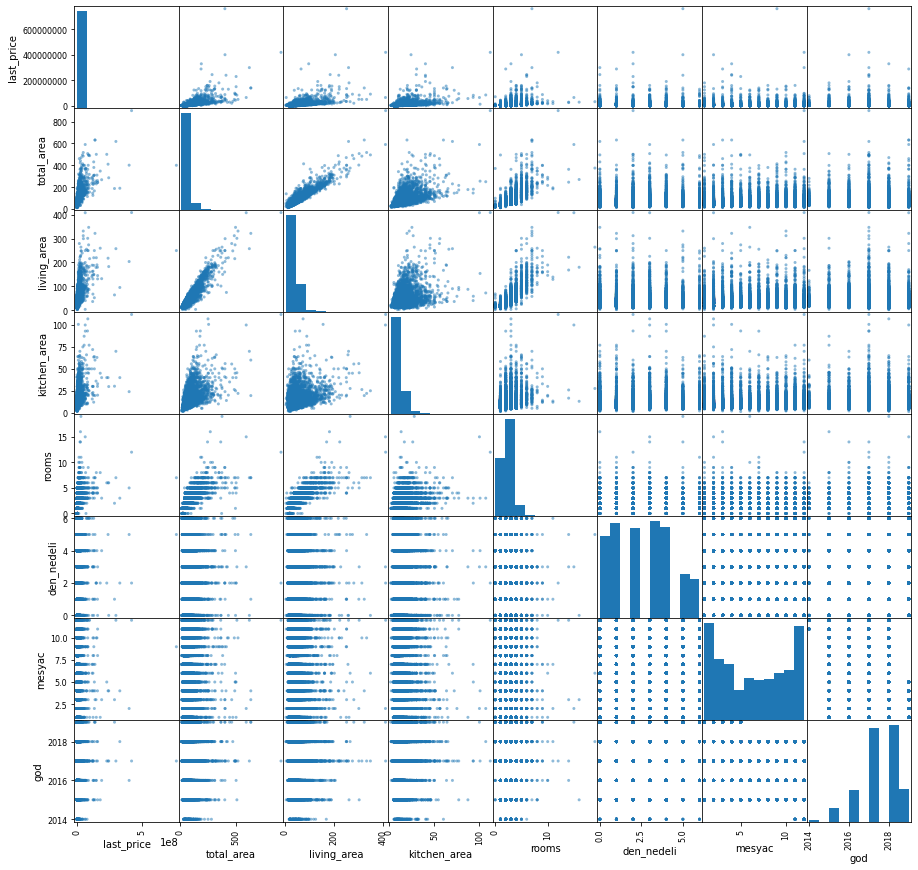

In [56]:
pd.plotting.scatter_matrix(total_price, figsize=(15, 15))

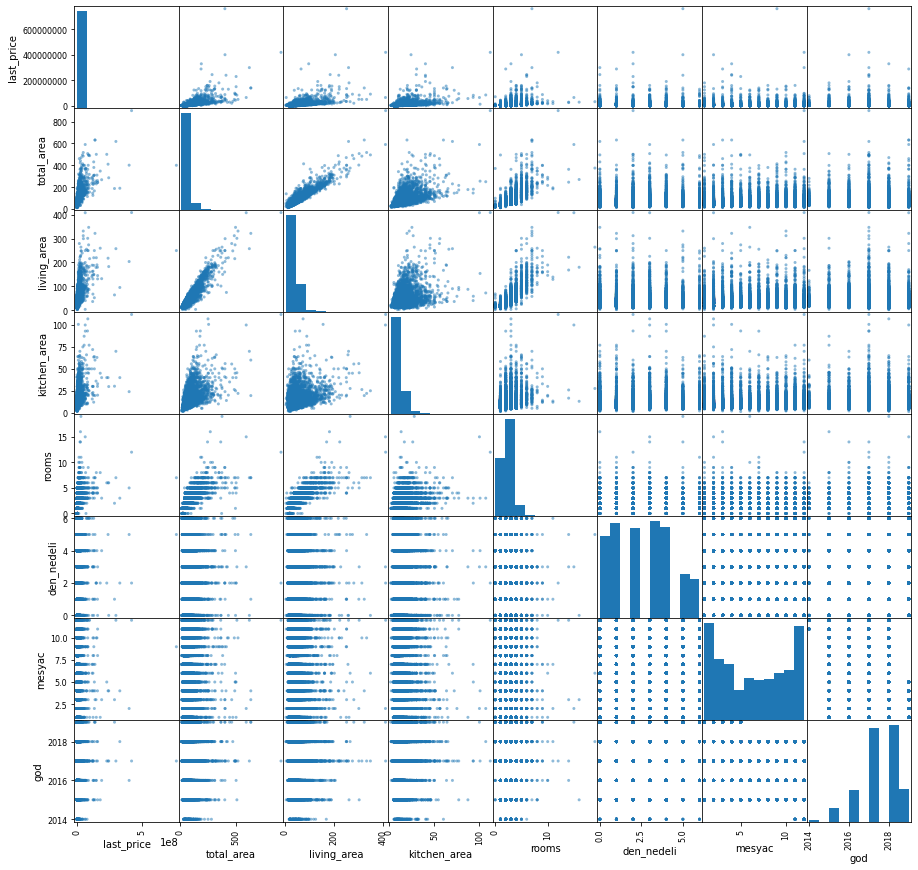

In [57]:
# Код ревьюера

pd.plotting.scatter_matrix(total_price, figsize=(15, 15))
None

 Наблюдаем корреляцию по last_price от очень слабой(god,mesyac,den_nedeli) до средней(kitchen_area, living_area, total_area)

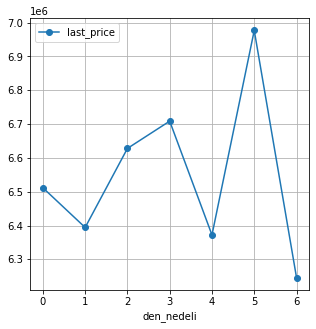

In [58]:
#посмотрим отдельно на зависимости от времени размещения
(
    data.pivot_table(index='den_nedeli', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

##### Вывод:
    Самая высокая цена получается по субботам, самая низкая в воскресенье

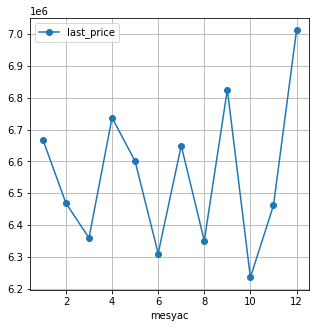

In [59]:
(
    data.pivot_table(index='mesyac', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

##### Вывод:
    Дороже всего квартиры продоваемые к Новому году, дешевле всего квартиры в октябре, также наблюдается некий спад
    +- через месяц после пика, подозреваю, что это связано с падением продаж на фоне повышгения цены
    (с высокой ценой квартира долго  висит, после чего цену опускают)

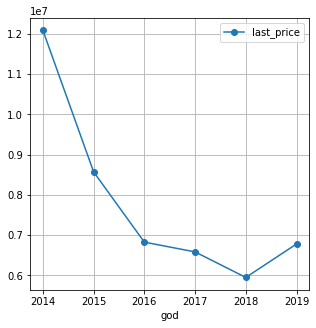

In [60]:
(
    data.pivot_table(index='god', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

##### Вывод:
    С 2014 года наблюдается спад цен на квартиры, пик приходится на 2014 год, самые дешёвые были в 2018

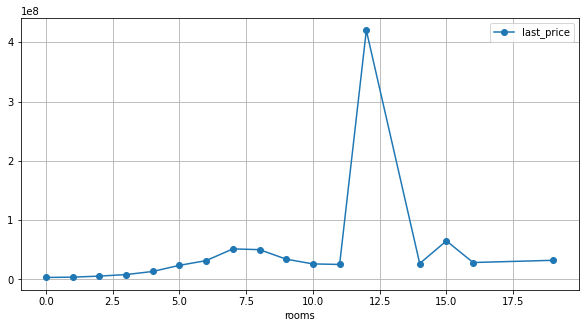

In [61]:
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.show()

##### Вывод:
    Пик приходится на квартиры с 12 комнатами, подозреваю, что это единичный экземпляр, так как квартиры с боее чем 7 комнатами 
    это уже не стандарт(всё, что больше 7, возможно частный дом), если же посмотреть на значения от 1 до 7 комнат, то видно,
    что цена растёт пропорционально числу комнат с пиком в 7 комнатах и минимумом в 1ой комнате

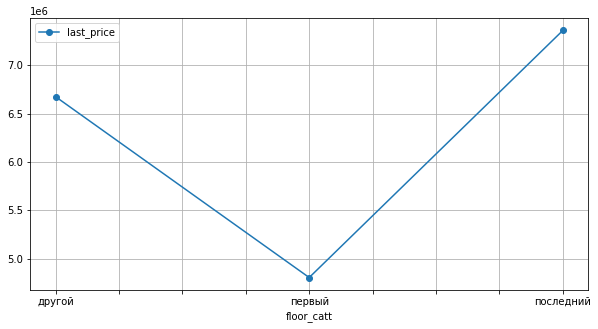

In [62]:
(
    data.pivot_table(index='floor_catt', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.show()

##### Вывод:
    Если рассмотреть по этажам, больше всего стоит последний этаж, дешевле всего - первый(с реальностью сходится)

0.6536750579657242

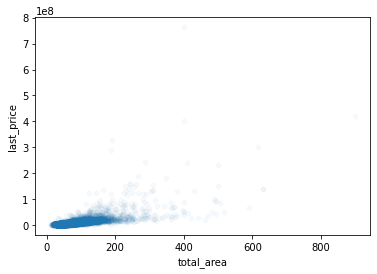

In [64]:
data.plot(kind = 'scatter', y = 'last_price', x = 'total_area', alpha = 0.03)
data['total_area'].corr(data['last_price'])

0.5664915336952651

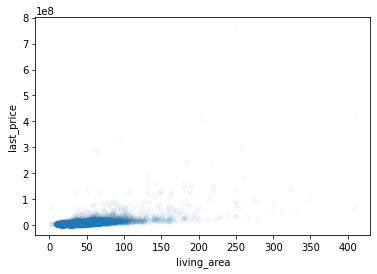

In [65]:
data.plot(kind = 'scatter', y = 'last_price', x = 'living_area', alpha = 0.03)
data['living_area'].corr(data['last_price'])

0.5198690130216392

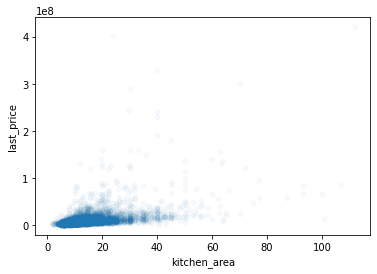

In [66]:
data.plot(kind = 'scatter', y = 'last_price', x = 'kitchen_area', alpha = 0.03)
data['kitchen_area'].corr(data['last_price'])

##### Вывод:
    Для площадей можно сделать вывод, что чем выше площадь - тем выше стоимость.

#### Задание: Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
    
    Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в 
    столбце locality_name.(использовал новый столбец locality_name_new)


In [67]:
#Выделим топ 10 населённых пунктов по средней стоимости квадратного метра
city_ten = data['locality_name_new'].value_counts().head(10)
city_last_price = data.query('locality_name_new in (@city_ten.index)').pivot_table(values='cena_kvadratnogo_metra', index='locality_name_new')
city_last_price = city_last_price.astype(int)
city_last_price.sort_values('cena_kvadratnogo_metra', ascending=False)

,cena_kvadratnogo_metra
locality_name_new,
Санкт-Петербург,114848
Пушкин,103125
Кудрово,95324
Парголово,90175
Мурино,86087
Шушары,78676
Колпино,75424
Гатчина,68745
Всеволожск,68654


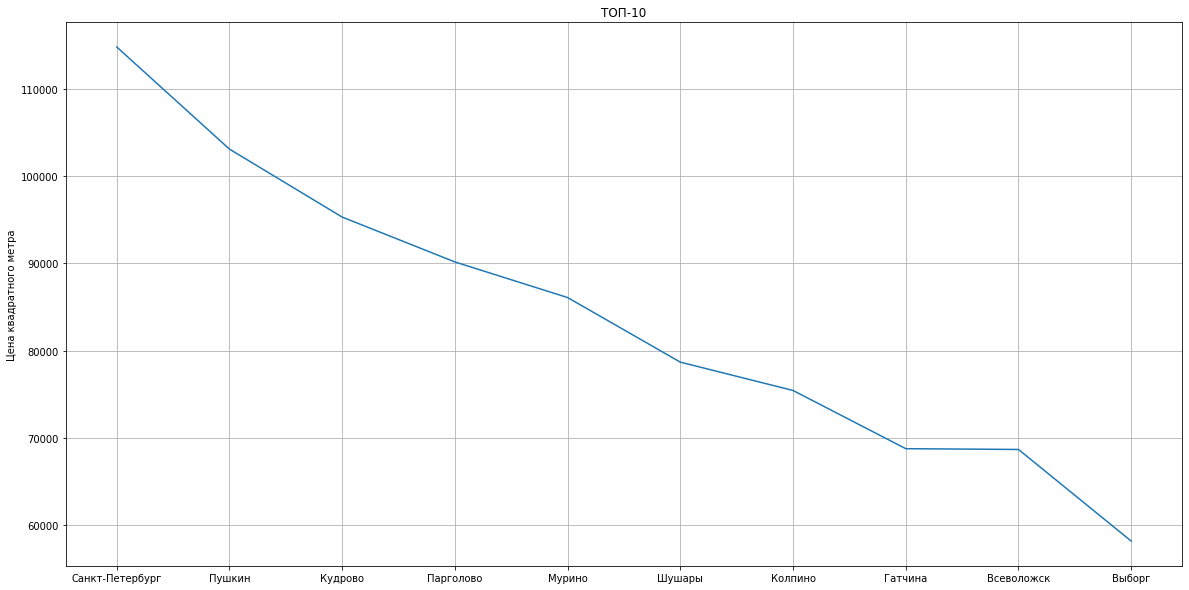

In [68]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(20, 10))
axes.set_ylabel('Цена квадратного метра')
axes.set_title('ТОП-10')
axes.plot(city_last_price.sort_values('cena_kvadratnogo_metra', ascending=False))
axes.grid()
plt.subplots_adjust(wspace=0.1, hspace=0.5)

Не диаграмма, но мне показалось, что такой вид информативнее

<AxesSubplot:xlabel='locality_name_new'>

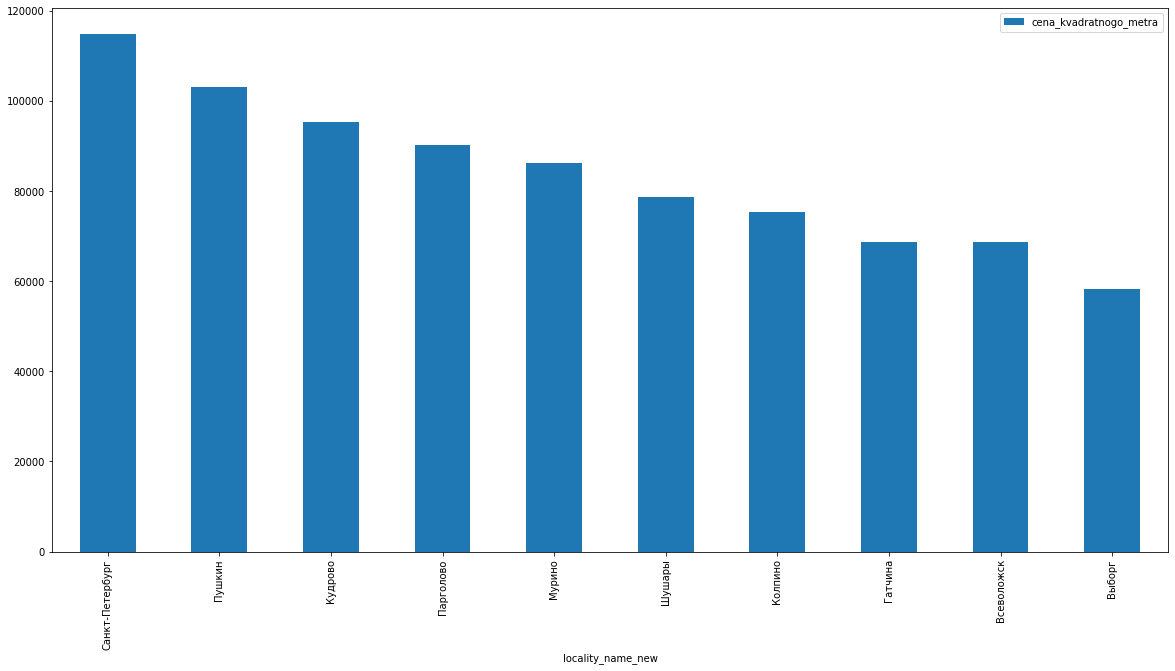

In [69]:
city_last_price.sort_values('cena_kvadratnogo_metra', ascending=False).plot(kind = 'bar', figsize=(20, 10))

Столбчатая диаграмма по населённым пунктам

##### Вывод:
    
    Самаявысокая стоимость в Санкт-Петербурге, самая низкая - в Выборге

#### Задание: Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. 
    Опишите, как стоимость объектов зависит от расстояния до центра города.

In [70]:
data = data.query('locality_name_new == "Санкт-Петербург"')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15721 entries, 0 to 23697
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            15721 non-null  int64         
 1   last_price              15721 non-null  int64         
 2   total_area              15721 non-null  float64       
 3   first_day_exposition    15721 non-null  datetime64[ns]
 4   rooms                   15721 non-null  int64         
 5   ceiling_height          10104 non-null  float64       
 6   floors_total            15651 non-null  float64       
 7   living_area             14581 non-null  float64       
 8   floor                   15721 non-null  int64         
 9   is_apartment            15721 non-null  bool          
 10  studio                  15721 non-null  bool          
 11  open_plan               15721 non-null  bool          
 12  kitchen_area            14342 non-null  float6

In [71]:
data['km_ot_centra'] = (data['cityCenters_nearest']/1000).round()
data['km_ot_centra'].value_counts().index

/tmp/ipykernel_48/3610142281.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Float64Index([12.0, 15.0, 13.0, 14.0, 16.0, 11.0,  5.0, 17.0, 10.0,  4.0,  6.0,
               8.0,  9.0,  7.0,  3.0,  2.0, 18.0, 22.0,  1.0, 19.0, 21.0, 23.0,
              26.0, 20.0,  0.0, 25.0, 24.0, 28.0, 29.0, 27.0],
             dtype='float64')

In [72]:
cena_za_km = (data
               .pivot_table(index='km_ot_centra', values='cena_kvadratnogo_metra', aggfunc='mean'))
cena_za_km

,cena_kvadratnogo_metra
km_ot_centra,
0.0,245833.11111111112
1.0,177004.96354166666
2.0,157848.56451612903
3.0,121386.99142857143
4.0,133282.42296511628
5.0,140509.3391304348
6.0,151011.7508090615
7.0,156176.44523809524
8.0,125671.03015075377


In [73]:
plot_cena_za_km = cena_za_km
plot_cena_za_km['km'] = cena_za_km.index
plot_cena_za_km 

,cena_kvadratnogo_metra,km
km_ot_centra,,
0.0,245833.11111111112,0.0
1.0,177004.96354166666,1.0
2.0,157848.56451612903,2.0
3.0,121386.99142857143,3.0
4.0,133282.42296511628,4.0
5.0,140509.3391304348,5.0
6.0,151011.7508090615,6.0
7.0,156176.44523809524,7.0
8.0,125671.03015075377,8.0


<AxesSubplot:xlabel='km'>

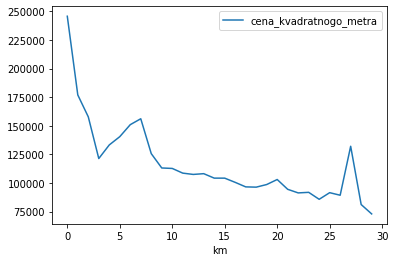

In [74]:
cena_za_km.plot(x='km', y='cena_kvadratnogo_metra' ,kind='line')

##### Вывод:
    Как можем видеть по графику, чем ближе центр - тем дароже недвижимость, пики на 7 и 26 км - скорее всего единичные случаи,не влияющие на общую динамику

### Общий вывод

#### В данном проекте нам предстояло проанализировать архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах и найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

###### В ходе предобработки проекта было сделано следущее:
    
    1.Проанализированы все интересные кейсы в интересующих нас столбцах
    2.Был изменён формат даты/времени в столбце first_day_exposition
    3.Были заполнены пропуски в days_exposition, balcony
    4.Был заменен тип данных для удобности работы/чтения в days_exposition, balcony, last_price
    5.Был проанализирован столбец is_appartment, было принято решение заполнить столбец значением False
    6.Были созданы столбцы: cena_kvadratnogo_metra, den_nedeli, mesyac, god, floor_catt, km_do_centra, locality_name_new для уобства дальнейшей работы и анализа
    
###### Анализ показал:
    
    1.Больше всего квартир продаётся в течение первых 5 дней, чуть реже после 45 дней и 60 дней и далее идёт на спад
    2.Самая высокая цена встречается по субботам, самая низкая по воскресеньям
    3.Дороже всего квартиры в декабре, дешевле всего в октябре
    4.С 2014 года по 2018 год наблюдается спадл цен на квартиры, с 2018 по 2019 наблюдается рост цен
    5.Присутствует следущая зависимость - чем больше комнат, тем больше цена
    6.Дороже всего квартиры, расположенные на последнем этаже, дешевле всего - на первом
    7.Чем выше площадь кухни - тем выше цена
    8.Чем выше жилая площадь - тем выше цена
    9.Самаявысокая стоимость в Санкт-Петербурге, самая низкая - в Выборге
    10.Для Санкт-Петербурга существует следущая зависимость - чем ближе центр, тем выше стоимость квадратного метра

###### Итог:
    
    Имея такие данные можно продолжать работу с более новыми файлами и искать новые закономерности в зависимости от новых типов недвижимости, в том числе и для других областей страны.